In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
df = pd.read_csv('data/dow_jones_index.csv')
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [4]:
df.dropna(inplace=True)


In [5]:
df['date'].astype('datetime64[ns]')


1     2011-01-14
2     2011-01-21
3     2011-01-28
4     2011-02-04
5     2011-02-11
         ...    
745   2011-05-27
746   2011-06-03
747   2011-06-10
748   2011-06-17
749   2011-06-24
Name: date, Length: 720, dtype: datetime64[ns]

In [6]:
df['next_weeks_close'] = df['next_weeks_close'].str.replace('$', '')
df['next_weeks_open'] = df['next_weeks_open'].str.replace('$', '')
df['open'] = df['open'].str.replace('$', '')
df['close'] = df['close'].str.replace('$', '')
df['low'] = df['low'].str.replace('$', '')
df['high'] = df['high'].str.replace('$', '')






/var/folders/60/b59yh0f10dn10yn_3tns4q84r1cn7t/T/ipykernel_25134/2508559938.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['next_weeks_close'] = df['next_weeks_close'].str.replace('$', '')
/var/folders/60/b59yh0f10dn10yn_3tns4q84r1cn7t/T/ipykernel_25134/2508559938.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['next_weeks_open'] = df['next_weeks_open'].str.replace('$', '')
/var/folders/60/b59yh0f10dn10yn_3tns4q84r1cn7t/T/ipykernel_25134/2508559938.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['op

In [7]:
df['next_weeks_close'] = df['next_weeks_close'].astype(float)
df['next_weeks_open'] = df['next_weeks_open'].astype(float)
df['open'] = df['open'].astype(float)
df['close'] = df['close'].astype(float)
df['low'] = df['low'].astype(float)
df['high'] = df['high'].astype(float)

df['percent_change_price'] = df['percent_change_price'].astype(float)
df['percent_change_volume_over_last_wk	'] = df['percent_change_volume_over_last_wk'].astype(float)
df['previous_weeks_volume'] = df['previous_weeks_volume'].astype(float)




In [8]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk\t
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1.380223
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,-43.024959
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,9.355500
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1.987452
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712,-25.712195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801,-21.355713
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960,15.221032
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120,17.508519
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786,8.811952


In [9]:
df.quarter.value_counts()


2    390
1    330
Name: quarter, dtype: int64

In [10]:
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print ("The selected dataframe have " + str(df.shape[1]) + " columns and " + str(df.shape[0])+" rows","\n\n")
        return mz_table

In [11]:
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])

/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

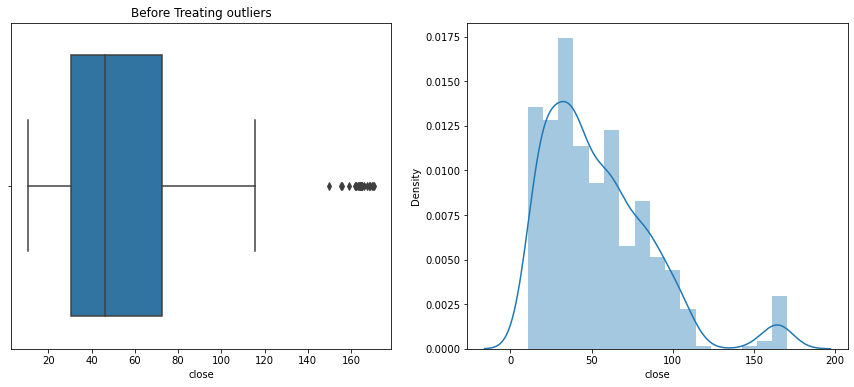

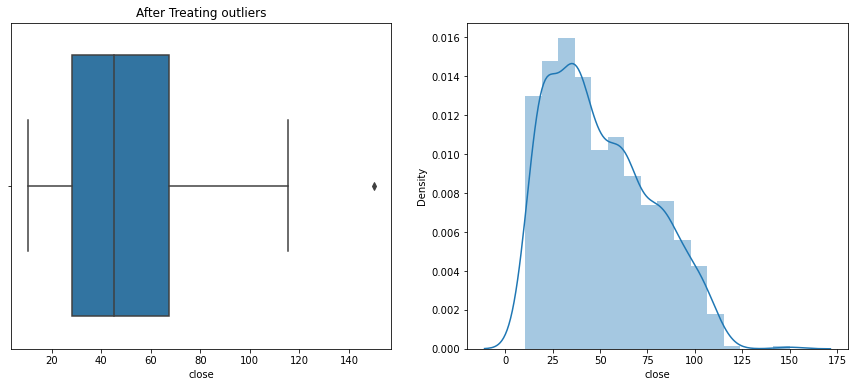

In [12]:
remove_outlier(df,'close')

/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

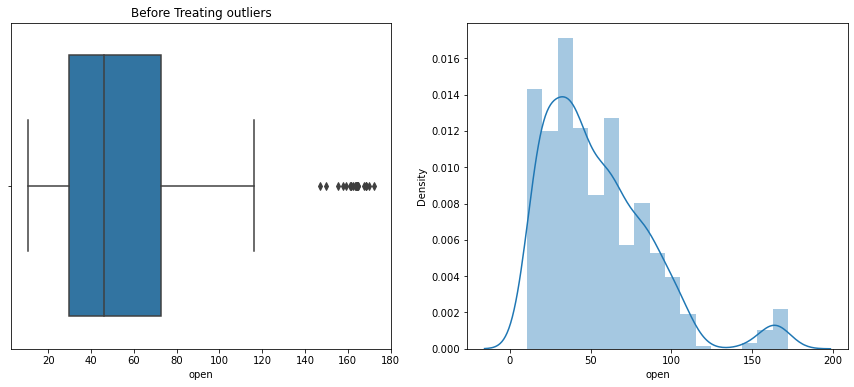

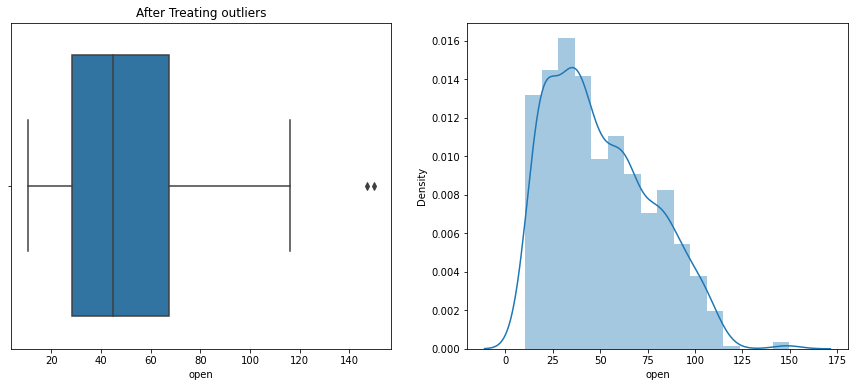

In [13]:
remove_outlier(df,'open')

/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

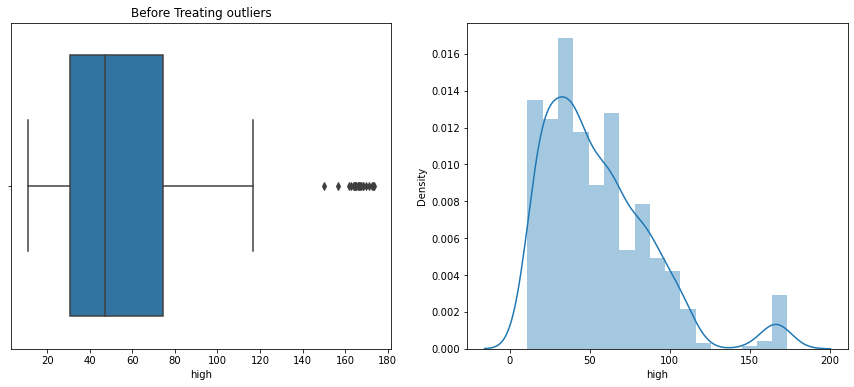

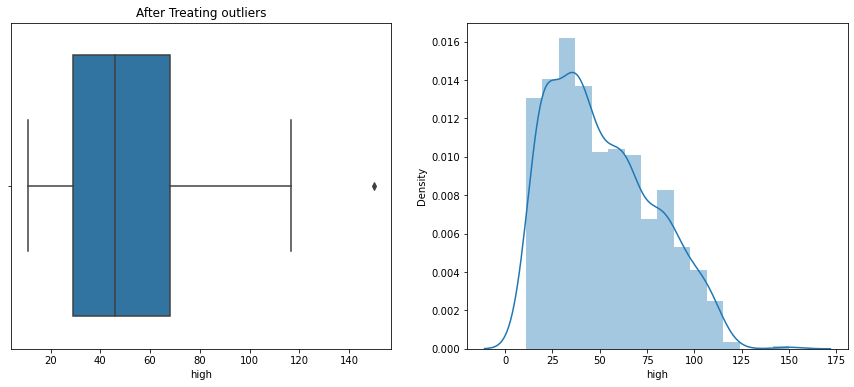

In [14]:
remove_outlier(df,'high')

/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

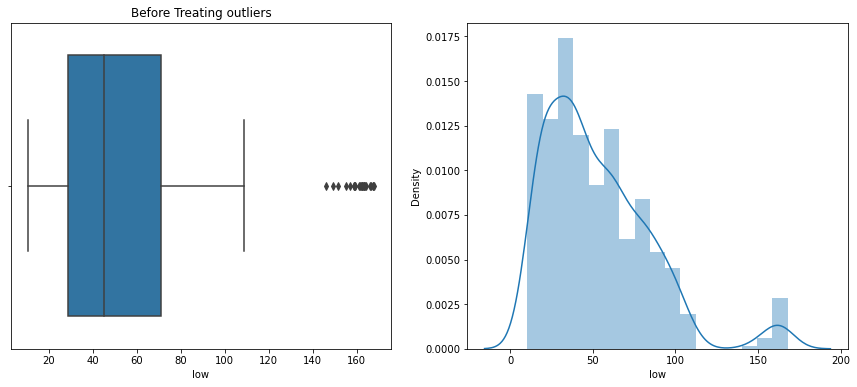

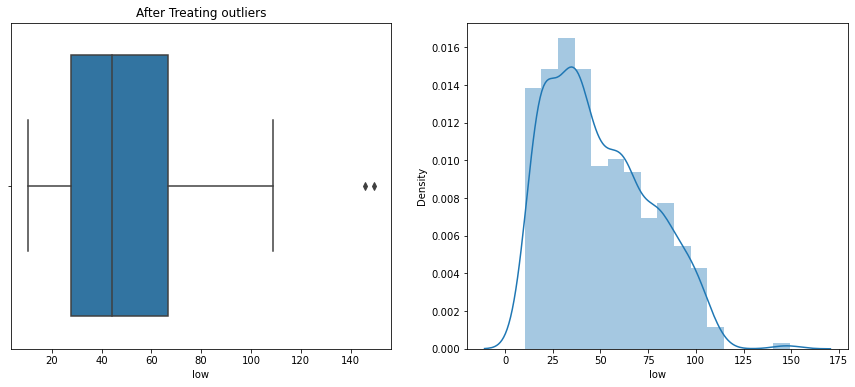

In [15]:
remove_outlier(df,'low')

In [16]:
import movecolumn as mc
import seaborn as sb

mc.MoveToLast(df,'close')






,quarter,stock,date,open,high,low,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk\t,close
1,1,AA,1/14/2011,16.71,16.71,15.64,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1.380223,15.97
2,1,AA,1/21/2011,16.19,16.38,15.60,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,-43.024959,15.79
3,1,AA,1/28/2011,15.87,16.63,15.82,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,9.355500,16.13
4,1,AA,2/4/2011,16.18,17.39,16.18,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1.987452,17.14
5,1,AA,2/11/2011,17.33,17.48,16.97,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712,-25.712195,17.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801,-21.355713,82.63
746,2,XOM,6/3/2011,83.28,83.75,80.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960,15.221032,81.18
747,2,XOM,6/10/2011,80.93,81.87,79.72,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120,17.508519,79.78
748,2,XOM,6/17/2011,80.00,80.82,78.33,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786,8.811952,79.02


In [17]:
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)


In [18]:
df


,quarter,stock,date,open,high,low,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk\t,close,open-close,low-high,target
1,1,AA,1/14/2011,16.71,16.71,15.64,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1.380223,15.97,0.74,-1.07,0
2,1,AA,1/21/2011,16.19,16.38,15.60,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,-43.024959,15.79,0.40,-0.78,1
3,1,AA,1/28/2011,15.87,16.63,15.82,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,9.355500,16.13,-0.26,-0.81,1
4,1,AA,2/4/2011,16.18,17.39,16.18,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1.987452,17.14,-0.96,-1.21,1
5,1,AA,2/11/2011,17.33,17.48,16.97,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712,-25.712195,17.37,-0.04,-0.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801,-21.355713,82.63,-2.41,-2.56,0
746,2,XOM,6/3/2011,83.28,83.75,80.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960,15.221032,81.18,2.10,-3.57,0
747,2,XOM,6/10/2011,80.93,81.87,79.72,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120,17.508519,79.78,1.15,-2.15,0
748,2,XOM,6/17/2011,80.00,80.82,78.33,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786,8.811952,79.02,0.98,-2.49,0


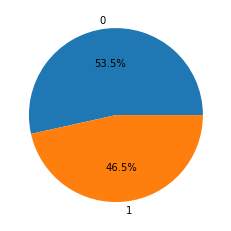

,quarter,date,open,high,low,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk\t,close,open-close,low-high,target
1,1,1/14/2011,16.71,16.71,15.64,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1.380223,15.97,0.74,-1.07,0
2,1,1/21/2011,16.19,16.38,15.60,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,-43.024959,15.79,0.40,-0.78,1
3,1,1/28/2011,15.87,16.63,15.82,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,9.355500,16.13,-0.26,-0.81,1
4,1,2/4/2011,16.18,17.39,16.18,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1.987452,17.14,-0.96,-1.21,1
5,1,2/11/2011,17.33,17.48,16.97,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712,-25.712195,17.37,-0.04,-0.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,5/27/2011,80.22,82.63,80.07,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801,-21.355713,82.63,-2.41,-2.56,0
746,2,6/3/2011,83.28,83.75,80.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960,15.221032,81.18,2.10,-3.57,0
747,2,6/10/2011,80.93,81.87,79.72,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120,17.508519,79.78,1.15,-2.15,0
748,2,6/17/2011,80.00,80.82,78.33,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786,8.811952,79.02,0.98,-2.49,0


In [19]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()
df.drop("stock", axis='columns')


/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/Users/luzi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


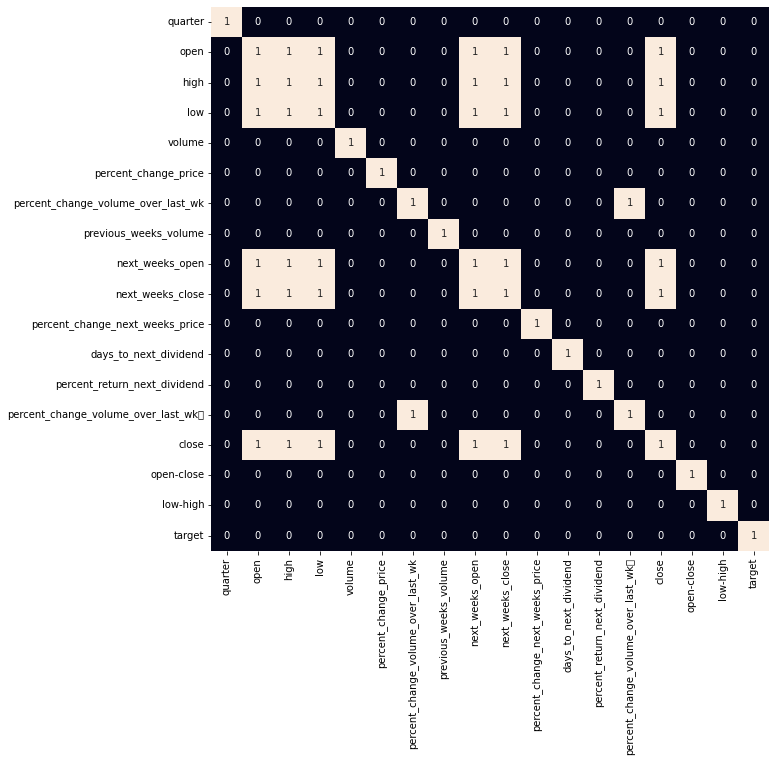

In [20]:
plt.figure(figsize=(10, 10))

sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [21]:
df1 = df.drop("stock", axis='columns')



In [22]:
df1

,quarter,date,open,high,low,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk\t,close,open-close,low-high,target
1,1,1/14/2011,16.71,16.71,15.64,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852,1.380223,15.97,0.74,-1.07,0
2,1,1/21/2011,16.19,16.38,15.60,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994,-43.024959,15.79,0.40,-0.78,1
3,1,1/28/2011,15.87,16.63,15.82,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989,9.355500,16.13,-0.26,-0.81,1
4,1,2/4/2011,16.18,17.39,16.18,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029,1.987452,17.14,-0.96,-1.21,1
5,1,2/11/2011,17.33,17.48,16.97,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712,-25.712195,17.37,-0.04,-0.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,5/27/2011,80.22,82.63,80.07,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801,-21.355713,82.63,-2.41,-2.56,0
746,2,6/3/2011,83.28,83.75,80.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960,15.221032,81.18,2.10,-3.57,0
747,2,6/10/2011,80.93,81.87,79.72,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120,17.508519,79.78,1.15,-2.15,0
748,2,6/17/2011,80.00,80.82,78.33,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786,8.811952,79.02,0.98,-2.49,0


In [23]:
features = df1[['open-close', 'low-high', 'percent_change_price','percent_change_volume_over_last_wk','previous_weeks_volume','next_weeks_open','next_weeks_close','percent_change_next_weeks_price']]
target = df1['target']
 
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(648, 8) (72, 8)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

In [25]:
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
lgr = LogisticRegression(solver='liblinear')


In [27]:
models = [LogisticRegression(),RandomForestClassifier(n_estimators=80),KNeighborsClassifier(n_neighbors=79)]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.9225443696450428
Validation Accuracy :  0.9268292682926829

RandomForestClassifier(n_estimators=80) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9118804091266719

KNeighborsClassifier(n_neighbors=79) : 
Training Accuracy :  0.9075696144430845
Validation Accuracy :  0.885916601101495



In [59]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'stock'.
df1['stock']= label_encoder.fit_transform(df['stock'])
  
df1['stock'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17,
       16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score


In [61]:
# Logistic Regression Score

# fit
lgr.fit(X_train, Y_train)

# predict
y_pred = lgr.predict(X_valid)

# f1 score
score = f1_score(y_pred, Y_valid)
print(score)


0.8253968253968254


In [62]:
#Random Forest Score


# fit
ran.fit(X_train, Y_train)

# predict
y_pred = ran.predict(X_valid)

# f1 score
score = f1_score(y_pred, Y_valid)
print(score)



0.835820895522388


In [63]:
# knn score

# fit
knn.fit(X_train, Y_train)

# predict
y_pred = knn.predict(X_valid)

# f1 score
score = f1_score(y_pred, Y_valid)
print(score)



0.7796610169491526


In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(C=100, penalty="l2")
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.8534375000000001


/Users/luzi/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luzi/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luzi/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/luzi/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise 

In [125]:
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=[2], n_estimators=[256])

# Build the grid search
dfrst = RandomForestClassifier()
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, Y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.87193798], using {'max_depth': 2, 'n_estimators': 256}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.189341,0.009543,0.011895,0.000145,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.861538,0.853846,0.884615,0.852713,0.906977,0.871938,0.020945,1


In [126]:
knnGrdS = KNeighborsClassifier(n_neighbors = 17)
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knnGrdS, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [127]:
print(grid_search.best_params_)


{'n_neighbors': 17}


In [128]:
print(grid.best_score_)
print(grid.best_estimator_)


0.8164663461538462
KNeighborsClassifier(n_neighbors=17)


In [129]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )


Accuracy for our training dataset with tuning is : 81.65%


In [130]:
knnGrdS.fit(X_train, Y_train)
dfrst.fit(X_train, Y_train)
logreg.fit(X_train, Y_train)

LogisticRegression(C=100)

In [132]:
modelsAfterGridSearch = [logreg,dfrst,knnGrdS]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{modelsAfterGridSearch[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, modelsAfterGridSearch[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, modelsAfterGridSearch[i].predict_proba(X_valid)[:,1]))
  print()



LogisticRegression(C=100) : 
Training Accuracy :  0.9236440483476132
Validation Accuracy :  0.9260424862313139

RandomForestClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  0.892997639653816

KNeighborsClassifier(n_neighbors=17) : 
Training Accuracy :  0.9127046358629131
Validation Accuracy :  0.8690007867820615



In [133]:

# Logistic Regression Score

# fit
logreg.fit(X_train, Y_train)

# predict
y_pred = logreg.predict(X_valid)

# f1 score
score = f1_score(y_pred, Y_valid)
print(score)


0.8387096774193549


In [134]:

#Random Forest Score


# fit
dfrst.fit(X_train, Y_train)

# predict
y_pred = dfrst.predict(X_valid)

# f1 score
score = f1_score(y_pred, Y_valid)
print(score)



0.835820895522388


In [135]:
# knn score

# fit
knnGrdS.fit(X_train, Y_train)

# predict
y_pred = knnGrdS.predict(X_valid)

# f1 score
score = f1_score(y_pred, Y_valid)
print(score)



0.7575757575757576
